# <center>Analysis of How the Number of Simulations Affects Performance</center>

This file is an interactive notebook to analyze the data obtained from tests.<br>
It focuses on examining what happens when the number of simulations run per move for each hypergame is increased.

NumHyperGames = 16<br>
NumBranches = 25 (> branching factor for kriegTTT_4x4)

## Reading in the Data

First the match data must be read in.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
numProbes_count = [30, 16, 8, 4, 2, 1]
numNames = ['numProbes_30', 'numProbes_16', 'numProbes_8', 'numProbes_4', 'numProbes_2', 'numProbes_1']
data = list()

for idx, name in enumerate(numNames):
    file_name = 'testOutput/kriegTTT_4x4/numProbes/' + name + '/testOutput.csv'
    data.append(pd.DataFrame)
    data[idx] = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
for game in data:
    display(game.head())

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numProbes30_0,kriegTTT_4x4,2,1590720726461,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numProbes30_1,kriegTTT_4x4,2,1590720783171,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numProbes30_3,kriegTTT_4x4,2,1590721281231,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numProbes30_4,kriegTTT_4x4,2,1590721339157,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numProbes30_5,kriegTTT_4x4,2,1590721475270,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numProbes16_0,kriegTTT_4x4,2,1590717996641,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numProbes16_2,kriegTTT_4x4,2,1590718452031,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numProbes16_3,kriegTTT_4x4,2,1590718485512,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numProbes16_4,kriegTTT_4x4,2,1590718518854,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numProbes16_5,kriegTTT_4x4,2,1590718605990,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numProbes8_0,kriegTTT_4x4,2,1590714279280,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numProbes8_1,kriegTTT_4x4,2,1590714302650,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numProbes8_2,kriegTTT_4x4,2,1590714320453,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numProbes8_3,kriegTTT_4x4,2,1590714337641,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numProbes8_4,kriegTTT_4x4,2,1590714362175,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames16_0,kriegTTT_4x4,2,1590643859597,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames16_1,kriegTTT_4x4,2,1590643869300,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames16_2,kriegTTT_4x4,2,1590643881538,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames16_3,kriegTTT_4x4,2,1590643890913,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numHypergames16_5,kriegTTT_4x4,2,1590644276139,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numProbes2_0,kriegTTT_4x4,2,1590674505420,10,300,XPLAYER,6,xplayer,HYPER,0,oplayer,IMPRANDOM,100
1,hypertest_numProbes2_1,kriegTTT_4x4,2,1590674513417,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numProbes2_2,kriegTTT_4x4,2,1590674519277,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numProbes2_3,kriegTTT_4x4,2,1590674527544,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numProbes2_4,kriegTTT_4x4,2,1590674533127,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numProbes1_0,kriegTTT_4x4,2,1590717293511,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numProbes1_1,kriegTTT_4x4,2,1590717300901,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numProbes1_2,kriegTTT_4x4,2,1590717305090,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numProbes1_3,kriegTTT_4x4,2,1590717310573,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numProbes1_4,kriegTTT_4x4,2,1590717315981,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [48]:
move_list_games = list()
for idx, name in enumerate(numNames):
    file_name_prefix = 'testOutput/kriegTTT_4x4/numProbes/' + name + '/moveset/'
    temp_move_list = list()
    for match_name in data[idx]['match_id']:
        file_name = file_name_prefix + match_name + '.csv'
        temp_move_list.append(pd.read_csv(file_name, header=0))
    move_list_games.append(temp_move_list)

# Verify by printing the head of the first game
for move_list in move_list_games:
    display(move_list[0])

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numProbes30_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 2 4 )
1,hypertest_numProbes30_0,kriegTTT_4x4,0,XPLAYER,hyper,1,30,0,2971,(MARK 3 2 )
2,hypertest_numProbes30_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,10,0,(MARK 1 4 )
3,hypertest_numProbes30_0,kriegTTT_4x4,1,XPLAYER,hyper,15,30,19,31380,(MARK 2 2 )
4,hypertest_numProbes30_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,50,0,(MARK 3 2 )
5,hypertest_numProbes30_0,kriegTTT_4x4,2,XPLAYER,hyper,16,30,20,20359,(MARK 1 2 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numProbes16_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,1,0,(MARK 3 2 )
1,hypertest_numProbes16_0,kriegTTT_4x4,0,XPLAYER,hyper,1,16,1,1764,(MARK 1 4 )
2,hypertest_numProbes16_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,9,0,(MARK 4 2 )
3,hypertest_numProbes16_0,kriegTTT_4x4,1,XPLAYER,hyper,15,16,9,17451,(MARK 1 2 )
4,hypertest_numProbes16_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,39,0,(MARK 1 1 )
5,hypertest_numProbes16_0,kriegTTT_4x4,2,XPLAYER,hyper,16,16,21,13969,(MARK 1 3 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numProbes8_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,6,0,(MARK 3 3 )
1,hypertest_numProbes8_0,kriegTTT_4x4,0,XPLAYER,hyper,1,8,6,890,(MARK 3 2 )
2,hypertest_numProbes8_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,16,0,(MARK 4 1 )
3,hypertest_numProbes8_0,kriegTTT_4x4,1,XPLAYER,hyper,15,8,22,9085,(MARK 2 2 )
4,hypertest_numProbes8_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,46,0,(MARK 1 1 )
5,hypertest_numProbes8_0,kriegTTT_4x4,2,XPLAYER,hyper,16,8,21,5440,(MARK 1 2 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames16_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 4 2 )
1,hypertest_numHypergames16_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,579,(MARK 1 1 )
2,hypertest_numHypergames16_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,15,0,(MARK 2 2 )
3,hypertest_numHypergames16_0,kriegTTT_4x4,1,XPLAYER,hyper,15,4,15,4693,(MARK 2 2 )
4,hypertest_numHypergames16_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,122,0,(MARK 1 4 )
5,hypertest_numHypergames16_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,69,4280,(MARK 2 3 )
6,hypertest_numHypergames16_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,47,0,(MARK 2 1 )
7,hypertest_numHypergames16_0,kriegTTT_4x4,3,XPLAYER,hyper,16,4,16,3694,(MARK 1 3 )
8,hypertest_numHypergames16_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,232,0,(MARK 1 2 )
9,hypertest_numHypergames16_0,kriegTTT_4x4,4,XPLAYER,hyper,16,4,185,2259,(MARK 1 2 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numProbes2_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 1 3 )
1,hypertest_numProbes2_0,kriegTTT_4x4,0,XPLAYER,hyper,1,2,0,263,(MARK 1 2 )
2,hypertest_numProbes2_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,15,0,(MARK 1 2 )
3,hypertest_numProbes2_0,kriegTTT_4x4,1,XPLAYER,hyper,15,2,15,2271,(MARK 3 4 )
4,hypertest_numProbes2_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,116,0,(MARK 3 4 )
5,hypertest_numProbes2_0,kriegTTT_4x4,2,XPLAYER,hyper,16,2,15,1683,(MARK 2 1 )
6,hypertest_numProbes2_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,185,0,(MARK 4 4 )
7,hypertest_numProbes2_0,kriegTTT_4x4,3,XPLAYER,hyper,16,2,107,1474,(MARK 2 4 )
8,hypertest_numProbes2_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,69,0,(MARK 4 3 )
9,hypertest_numProbes2_0,kriegTTT_4x4,4,XPLAYER,hyper,16,2,1034,950,(MARK 4 4 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numProbes1_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 1 1 )
1,hypertest_numProbes1_0,kriegTTT_4x4,0,XPLAYER,hyper,1,1,0,200,(MARK 1 4 )
2,hypertest_numProbes1_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,9,0,(MARK 1 2 )
3,hypertest_numProbes1_0,kriegTTT_4x4,1,XPLAYER,hyper,15,1,9,1381,(MARK 1 2 )
4,hypertest_numProbes1_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,134,0,(MARK 3 2 )
5,hypertest_numProbes1_0,kriegTTT_4x4,2,XPLAYER,hyper,16,1,81,1084,(MARK 2 2 )
6,hypertest_numProbes1_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,50,0,(MARK 2 2 )
7,hypertest_numProbes1_0,kriegTTT_4x4,3,XPLAYER,hyper,16,1,31,920,(MARK 1 3 )
8,hypertest_numProbes1_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,140,0,(MARK 4 4 )
9,hypertest_numProbes1_0,kriegTTT_4x4,4,XPLAYER,hyper,16,1,119,700,(MARK 2 3 )


## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 30 probes is 97.96% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 16 probes is 100.00% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 8 probes is 95.92% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 4 probes is 93.88% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 2 probes is 89.13% for 46 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 1 probes is 92.00% for 50 games


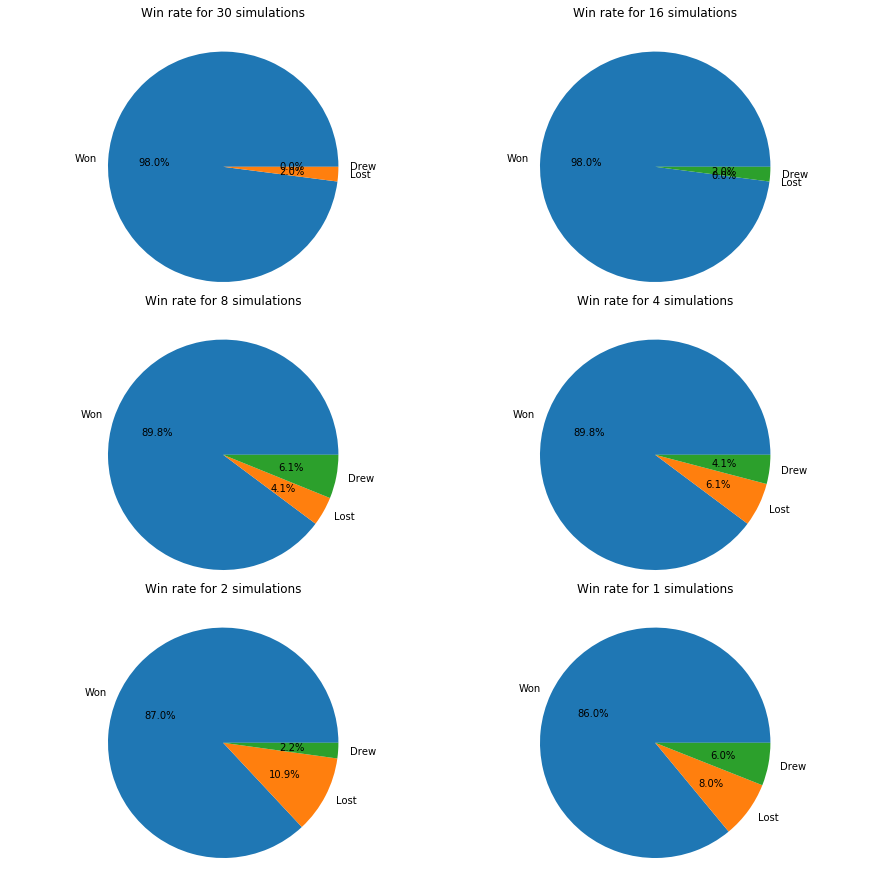

In [49]:
count_games_completed = list()
for idx, game in enumerate(data):
    total_score = data[idx]['player_1_score'].sum(skipna = True)
    total_count = len(data[idx]['player_1_score'])
    count_games_completed.append(total_count)
    print(f"The win/draw rate for the agent \"" + str(data[idx]['player_1'][0]) + "\" playing the game \"" + str(data[idx]['game_name'][0]) + "\" with " + str(numProbes_count[idx]) + f" probes is {(total_score/total_count):.2f}% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
data_len = len(data)
win_count = list()
for idx, game in enumerate(data):
    ax = fig.add_axes([(data_len - idx)%2,math.ceil((data_len - idx)/2),1,1])
    ax.axis('equal')
    ax.set_title('Win rate for ' + str(numProbes_count[idx]) + ' simulations')
    result = ['Won', 'Lost', 'Drew']
    game_count = [len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 0)]), len(game[(game['player_1_score'] == 0) & (game['player_2_score'] == 100)]), len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)])]
    win_count.append(game_count[0])
    ax.pie(game_count, labels = result,autopct='%1.1f%%')
plt.show()

It is now worth looking into how performance degrades with fewer probes.

First I will consider the number of games that can be completed without error compared to the number of probes.

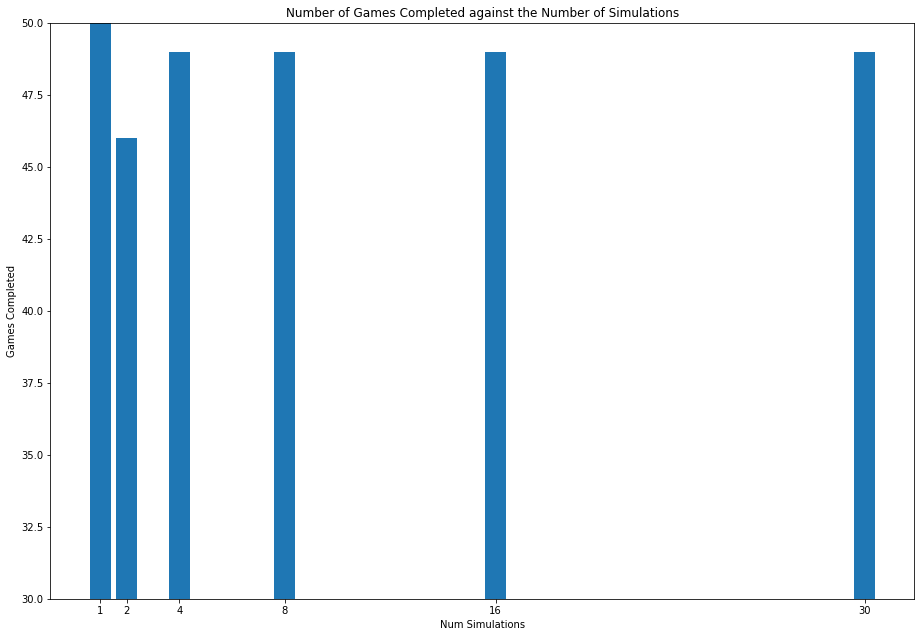

In [50]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2], label='state_update')
ax1.set_title('Number of Games Completed against the Number of Simulations')
ax1.set_xlabel('Num Simulations')
ax1.set_ylabel('Games Completed')
ax1.set_yscale('linear')
ax1.set_xticks(numProbes_count)
ax1.set_ylim([30,50])
ax1.bar(numProbes_count, count_games_completed)
plt.show()

I will now consider whether the number of games won

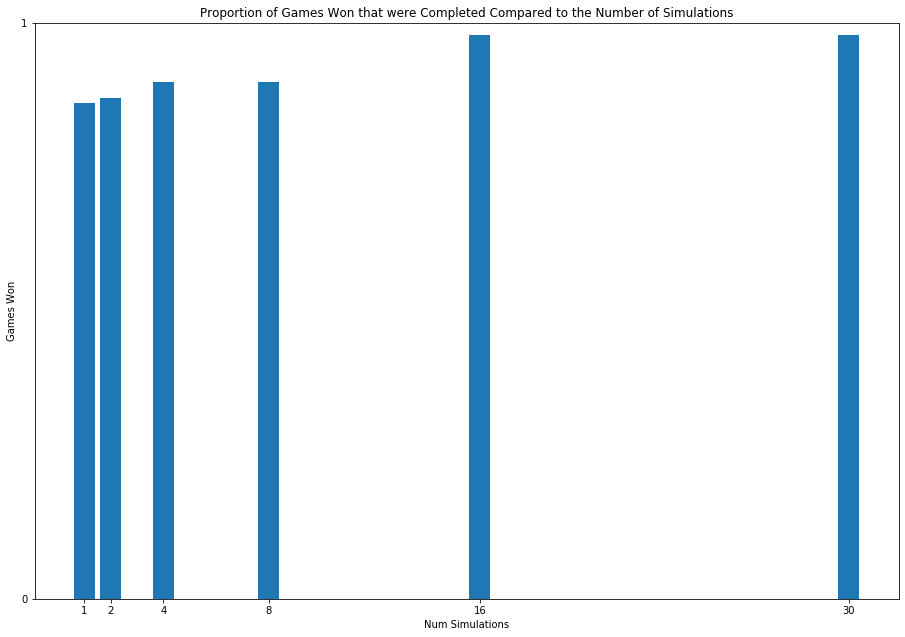

In [51]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Proportion of Games Won that were Completed Compared to the Number of Simulations')
ax1.set_xlabel('Num Simulations')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_xticks(numProbes_count)
ax1.set_yticks(range(0,2,1))
ax1.set_ylim([0,1])
ax1.bar(numProbes_count, np.divide(win_count,count_games_completed))
plt.show()

I will now consider the average time taken to win for various hypergames.

*Note: It is +1 because step increments from 0*

30 hypergames
	Mean steps to win: 3
	Median steps to win: 3.0
16 hypergames
	Mean steps to win: 3
	Median steps to win: 3.0
8 hypergames
	Mean steps to win: 3
	Median steps to win: 3.0
4 hypergames
	Mean steps to win: 3
	Median steps to win: 4.0
2 hypergames
	Mean steps to win: 3
	Median steps to win: 3.0
1 hypergames
	Mean steps to win: 4
	Median steps to win: 4


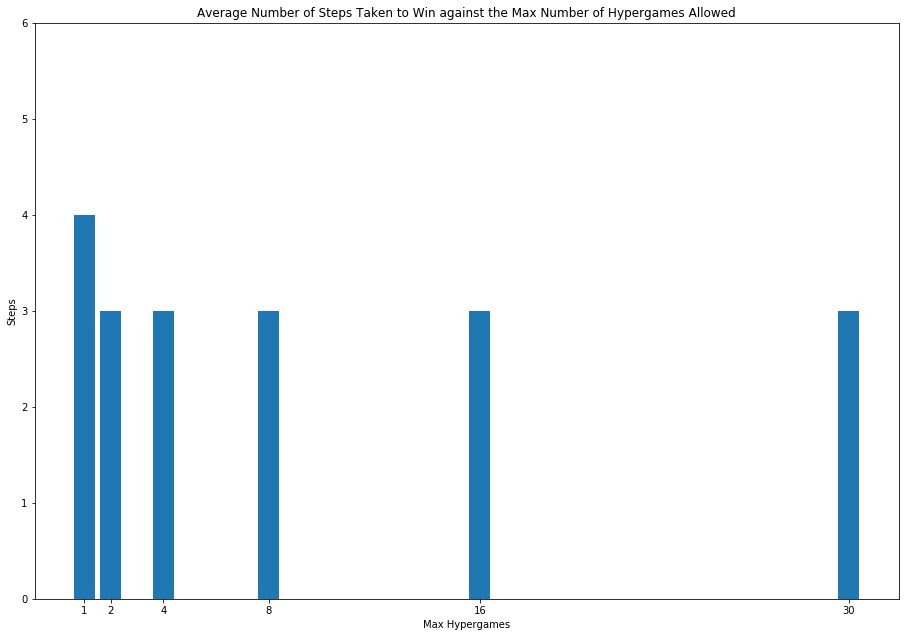

In [52]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    print(f'{numProbes_count[idx]} hypergames')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {statistics.median(game_steps_to_win)}')
    mean_steps_to_win.append(mean)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Average Number of Steps Taken to Win against the Max Number of Hypergames Allowed')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_xticks(numProbes_count)
ax1.set_yticks(range(0,10,1))
ax1.set_ylim([0,6])
ax1.bar(numProbes_count, mean_steps_to_win)
plt.show()

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [53]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\n\tnum_moves: " + str(self.num_moves) + "\n\tmean_time: " + str(statistics.mean(self.times)) + "\n\tmedian_time: " + str(statistics.median(self.times)) + " ms\n\ttimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player
time_to_update_list = list()
time_to_select_move_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    temp_time_to_update_list = list()
    temp_time_to_select_move_list = list()
    player_name = game['role_1'][0].upper()
    for move_set in move_list:
        for index, move_row in move_set.iterrows():
            if move_row['role_name'] == player_name:
                if move_row['step'] > len(temp_time_to_update_list) - 1:
                    temp_time_to_update_list.append(Tracker())
                    temp_time_to_select_move_list.append(Tracker())
                temp_time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
                temp_time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])
    time_to_update_list.append(temp_time_to_update_list)
    time_to_select_move_list.append(temp_time_to_select_move_list)

# Print the data
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print(str(numProbes_count[game_num]) + ' hypergames')
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        print('\tStep: ' + str(idx) + "\n")
        print('\tTime taken to update states:')
        print('\t' + str(update_step)  + "\n")
        print('\tTime taken to select move:')
        print('\t' + str(select_step)  + "\n\n\n")

30 hypergames
	Step: 0

	Time taken to update states:
	time_sum: 15 ms
	num_moves: 49
	mean_time: 0.30612244897959184
	median_time: 0 ms
	times (ms): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0]

	Time taken to select move:
	time_sum: 146602 ms
	num_moves: 49
	mean_time: 2991.877551020408
	median_time: 2992 ms
	times (ms): [2971, 2841, 2931, 2971, 2879, 2904, 2863, 3340, 2870, 3035, 2992, 3250, 2791, 3200, 3030, 2915, 2993, 2840, 3013, 2925, 2839, 2839, 2980, 2944, 3049, 2884, 3155, 3100, 2870, 3010, 3105, 2910, 3020, 3020, 3000, 3041, 3058, 2887, 3010, 2960, 3009, 2749, 2893, 3037, 3061, 3206, 2839, 3013, 3560]



	Step: 1

	Time taken to update states:
	time_sum: 661 ms
	num_moves: 49
	mean_time: 13.489795918367347
	median_time: 11 ms
	times (ms): [19, 9, 20, 20, 10, 10, 9, 11, 19, 10, 12, 21, 20, 11, 10, 10, 28, 10, 20, 9, 10, 10, 19, 19, 11, 13, 20, 19, 9, 19, 11, 10, 9, 18, 10, 1

Now I will graph the findings

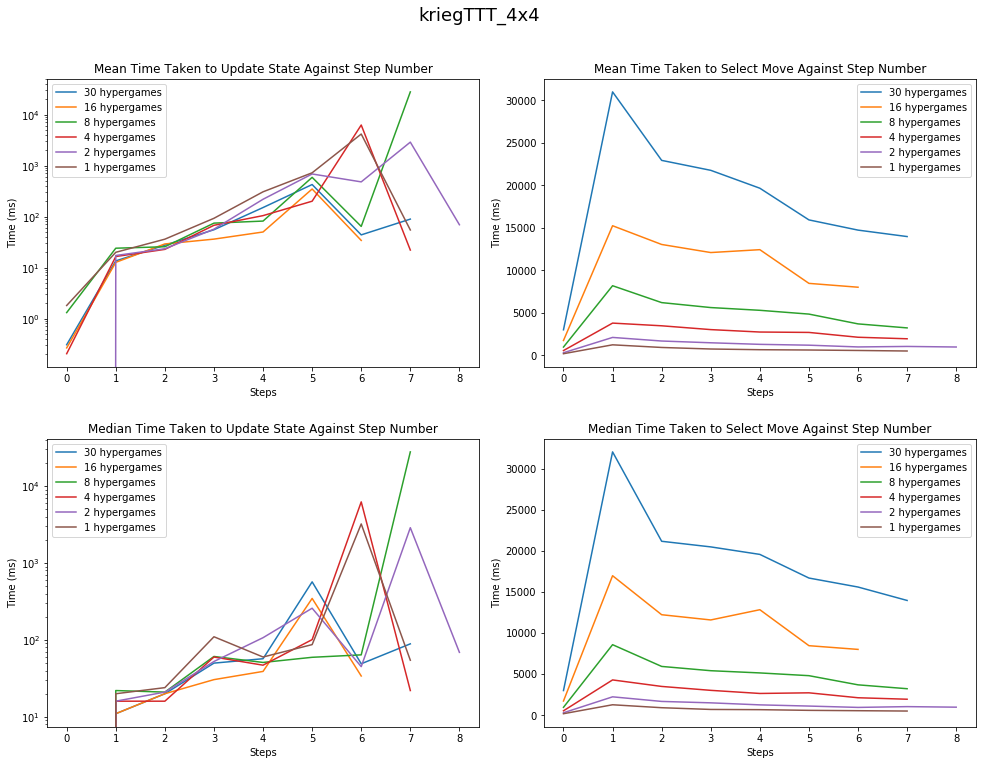

In [54]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    temp_mean_state_update_times = list()
    temp_mean_move_select_times = list()
    temp_median_state_update_times = list()
    temp_median_move_select_times = list()
    for update_step, select_step in zip(game_time_to_update_list, game_time_to_select_move_list):
        temp_mean_state_update_times.append(update_step.getMeanTime())
        temp_mean_move_select_times.append(select_step.getMeanTime())
        temp_median_state_update_times.append(update_step.getMedianTime())
        temp_median_move_select_times.append(select_step.getMedianTime())
    mean_state_update_times.append(temp_mean_state_update_times)
    mean_move_select_times.append(temp_mean_move_select_times)
    median_state_update_times.append(temp_median_state_update_times)
    median_move_select_times.append(temp_median_move_select_times)

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update_mean')
ax1.set_title('Mean Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    ax1.plot(game_mean_state_update_times, label=str(numProbes_count[idx]) + ' hypergames')
ax1.legend()

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select_mean')
ax2.set_title('Mean Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    ax2.plot(game_mean_move_select_times, label=str(numProbes_count[idx]) + ' hypergames')
ax2.legend()

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('log')
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    ax3.plot(game_median_state_update_times, label=str(numProbes_count[idx]) + ' hypergames')
ax3.legend()

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    ax4.plot(game_median_move_select_times, label=str(numProbes_count[idx]) + ' hypergames')
ax4.legend()

plt.show()